In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "emilia-romagna"

path_data = f'{path_root}/data'
path_img_root =  f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,8,Emilia-Romagna,15,2,17,9,26,8,8,...,0.0,243.0,0.0,3.0,11.76,65.38,3.29,0.00,0.00,44.44
1,2020-02-26T18:00:00,8,Emilia-Romagna,20,3,23,23,46,20,21,...,1.0,186.0,0.0,14.0,13.04,50.00,11.29,0.00,50.00,76.92
2,2020-02-27T18:00:00,8,Emilia-Romagna,36,6,42,54,96,50,50,...,0.0,456.0,0.0,31.0,14.29,43.75,10.96,0.00,100.00,108.70
3,2020-02-28T18:00:00,8,Emilia-Romagna,56,6,62,81,143,47,48,...,1.0,244.0,0.0,27.0,9.68,43.36,19.67,0.00,0.00,48.96
4,2020-02-29T17:00:00,8,Emilia-Romagna,86,11,97,116,213,70,72,...,2.0,273.0,0.0,35.0,11.34,45.54,26.37,0.00,83.33,48.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,2021-03-16T17:00:00,8,Emilia-Romagna,3516,378,3894,65098,68992,699,2184,...,47.0,41025.0,4834.0,642.0,9.71,5.64,5.32,45.18,1.34,1.02
386,2021-03-17T17:00:00,8,Emilia-Romagna,3542,381,3923,65692,69615,623,2026,...,52.0,37456.0,6155.0,594.0,9.71,5.64,5.41,32.92,0.79,0.90
387,2021-03-18T17:00:00,8,Emilia-Romagna,3551,385,3936,66502,70438,823,2531,...,65.0,37765.0,6399.0,810.0,9.78,5.59,6.70,39.55,1.05,1.18
388,2021-03-19T17:00:00,8,Emilia-Romagna,3549,386,3935,68852,72787,2349,3188,...,42.0,36016.0,6007.0,2350.0,9.81,5.41,8.85,53.07,0.26,3.33


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 20, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 2) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 2560
Nuovi tamponi: 36549.0
Percentuale nuovi positivi/nuovi tamponi: 7.000000000000001 %
Nuovi guariti: 1839.0
Nuovi deceduti: 47.0
Variazione positivi ricoverati con sintomi: -30.0
Variazione positivi in terapia intensiva: 15.0
Variazione positivi in isolamento dimiciliare: 667.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 20, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-19T17:00:00,8,Emilia-Romagna,2520,232,2752,50489,53241,-989,1034,...,75.0,23652.0,3834.0,-939.0,8.43,5.17,4.37,26.97,-2.52,-1.82
1,2021-01-20T17:00:00,8,Emilia-Romagna,2490,230,2720,49859,52579,-662,1090,...,63.0,20646.0,4598.0,-630.0,8.46,5.17,5.28,23.71,-0.86,-1.24
2,2021-01-21T17:00:00,8,Emilia-Romagna,2456,218,2674,49363,52037,-542,1320,...,73.0,21949.0,4578.0,-496.0,8.15,5.14,6.01,28.83,-5.22,-1.03
3,2021-01-22T17:00:00,8,Emilia-Romagna,2402,220,2622,48589,51211,-826,1347,...,43.0,21709.0,4089.0,-774.0,8.39,5.12,6.20,32.94,0.92,-1.59
4,2021-01-23T17:00:00,8,Emilia-Romagna,2390,217,2607,48125,50732,-479,1310,...,33.0,24676.0,3886.0,-464.0,8.32,5.14,5.31,33.71,-1.36,-0.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-03-16T17:00:00,8,Emilia-Romagna,3516,378,3894,65098,68992,699,2184,...,47.0,41025.0,4834.0,642.0,9.71,5.64,5.32,45.18,1.34,1.02
57,2021-03-17T17:00:00,8,Emilia-Romagna,3542,381,3923,65692,69615,623,2026,...,52.0,37456.0,6155.0,594.0,9.71,5.64,5.41,32.92,0.79,0.90
58,2021-03-18T17:00:00,8,Emilia-Romagna,3551,385,3936,66502,70438,823,2531,...,65.0,37765.0,6399.0,810.0,9.78,5.59,6.70,39.55,1.05,1.18
59,2021-03-19T17:00:00,8,Emilia-Romagna,3549,386,3935,68852,72787,2349,3188,...,42.0,36016.0,6007.0,2350.0,9.81,5.41,8.85,53.07,0.26,3.33


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

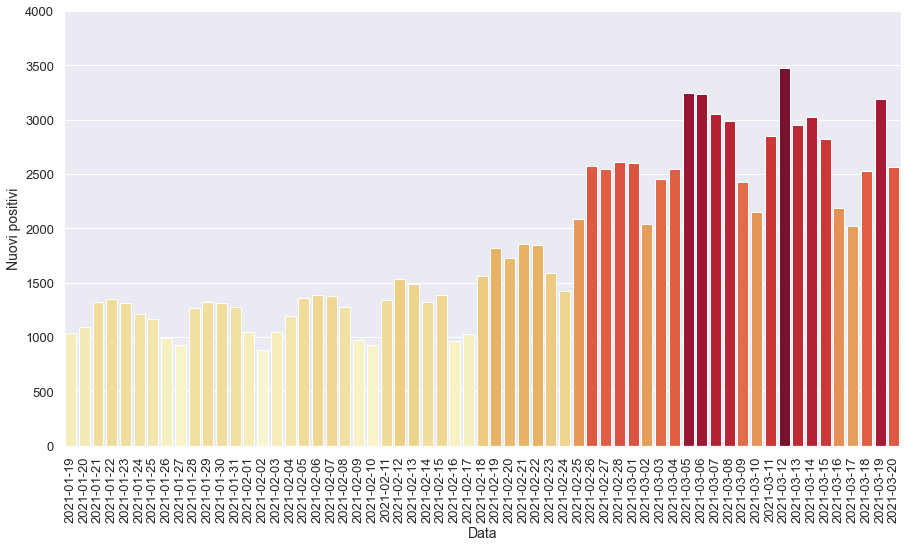

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

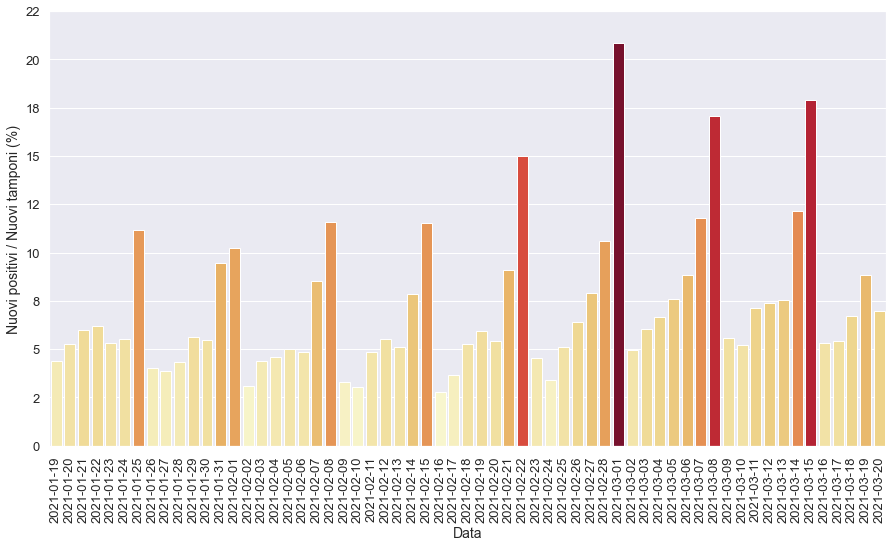

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

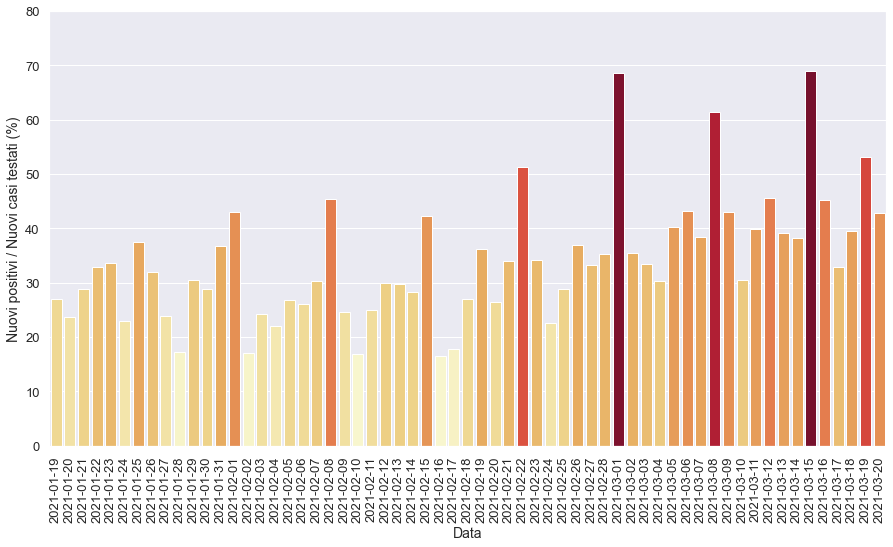

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

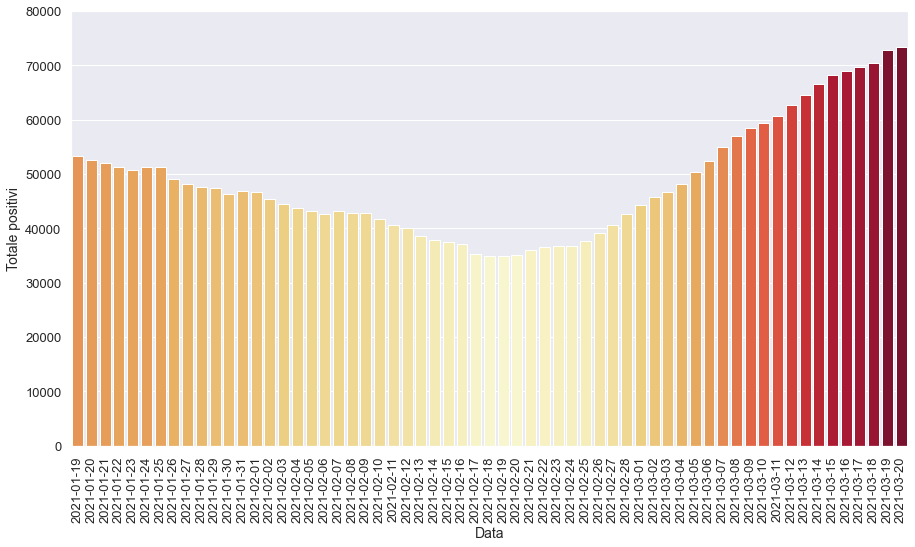

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

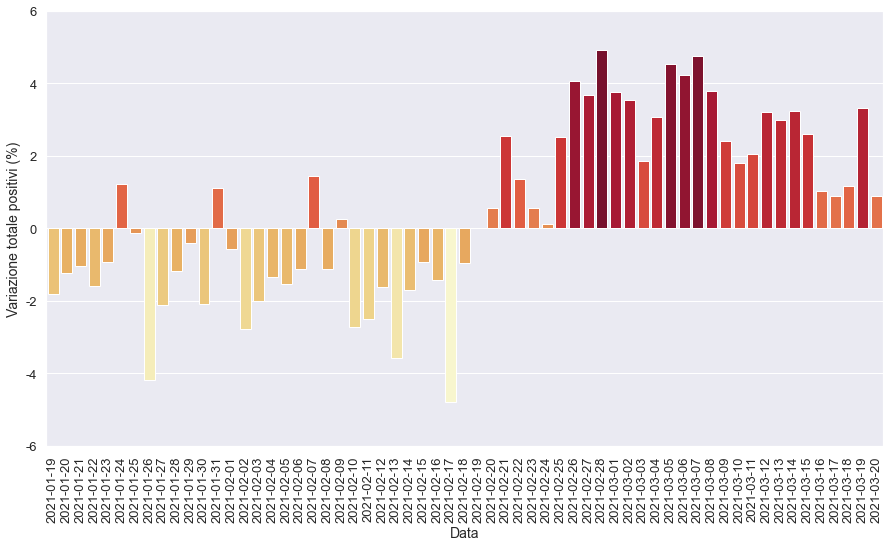

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

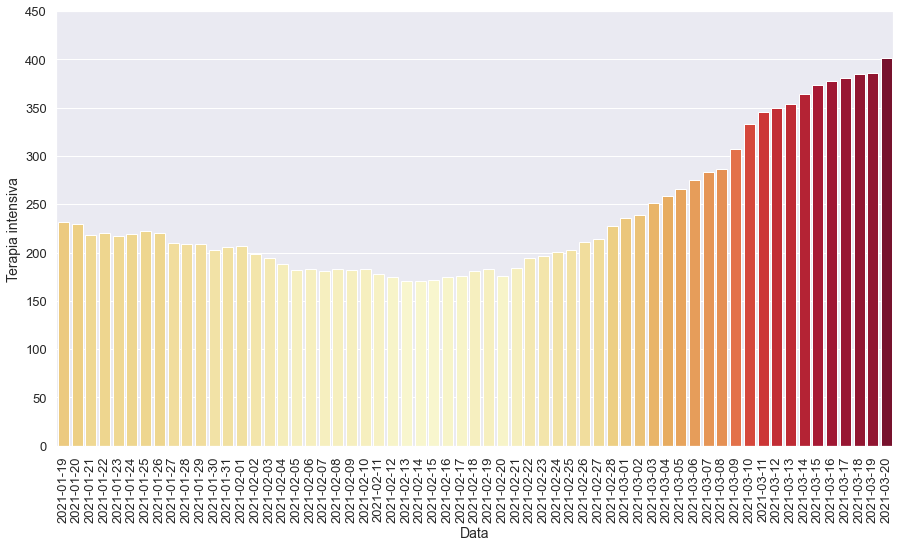

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

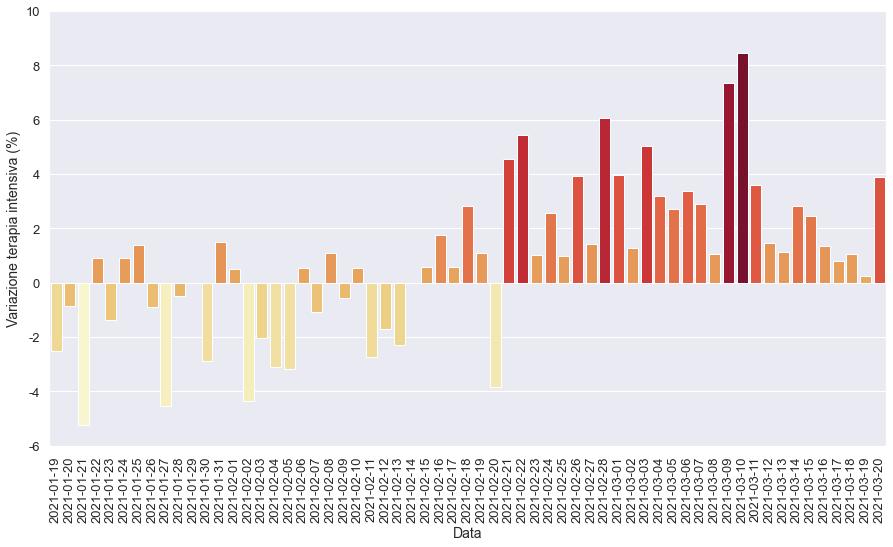

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

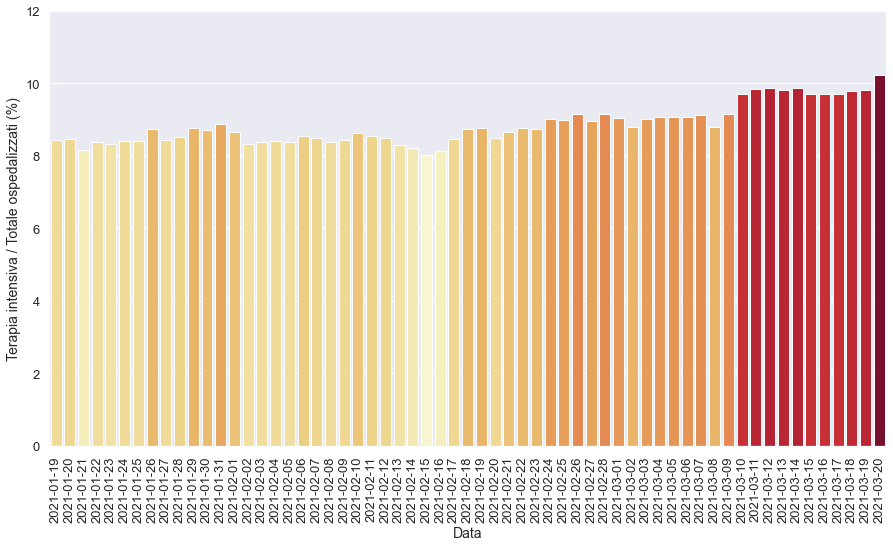

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

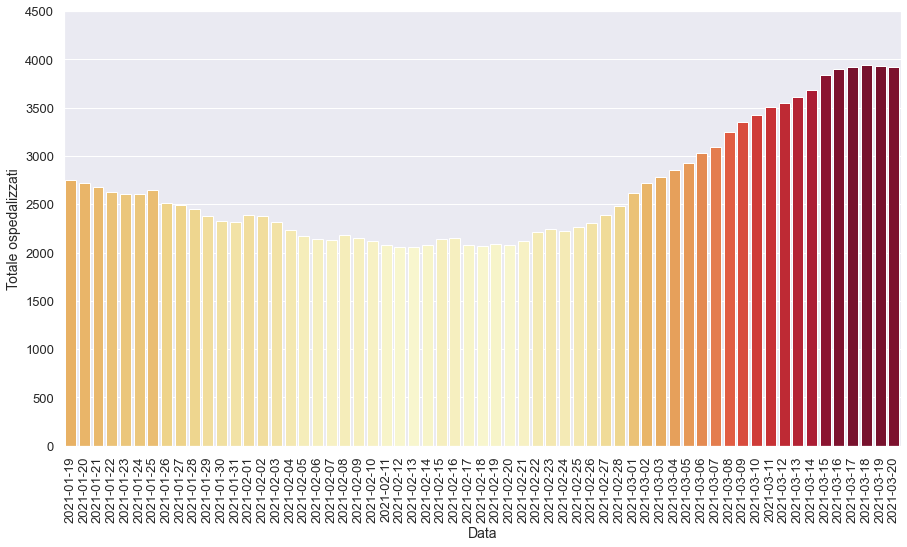

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

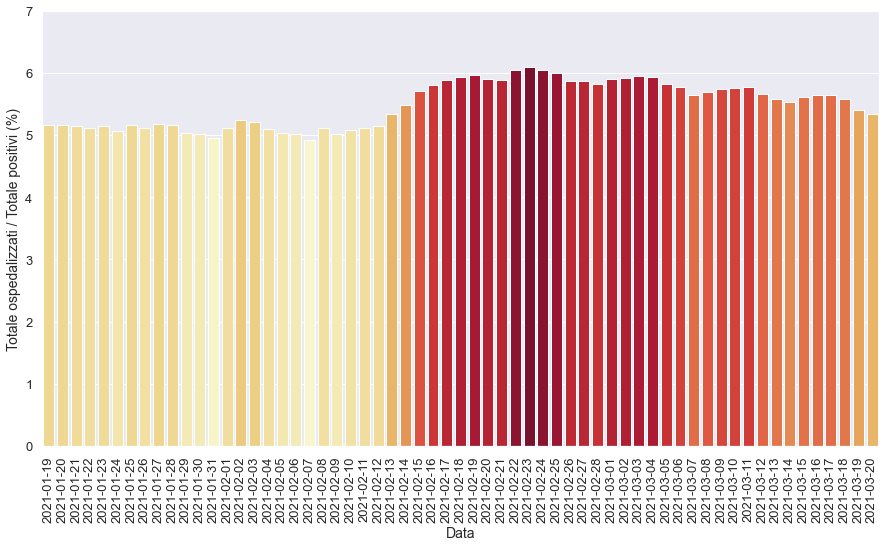

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

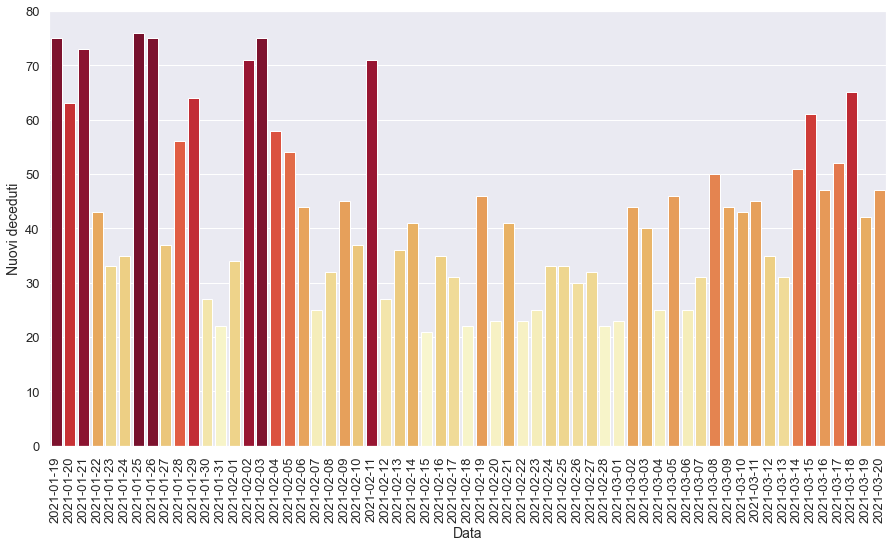

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

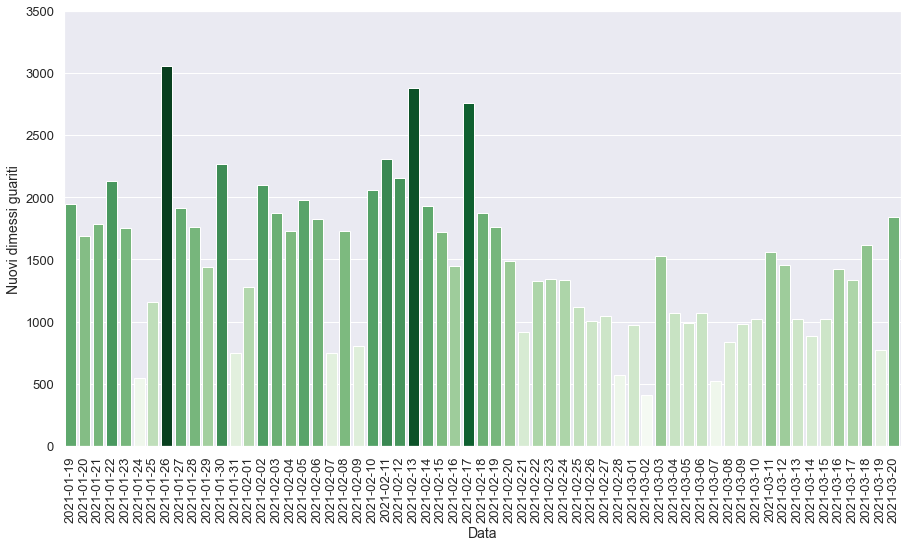

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-18T17:00:00,8,Emilia-Romagna,1890,181,2071,32858,34929,-339,1565,...,22.0,29633.0,5787.0,-332.0,8.74,5.93,5.28,27.04,2.84,-0.96
1,2021-02-19T17:00:00,8,Emilia-Romagna,1902,183,2085,32852,34937,8,1821,...,46.0,30716.0,5022.0,-6.0,8.78,5.97,5.93,36.26,1.10,0.02
2,2021-02-20T17:00:00,8,Emilia-Romagna,1899,176,2075,33058,35133,196,1724,...,23.0,31943.0,6500.0,206.0,8.48,5.91,5.40,26.52,-3.83,0.56
3,2021-02-21T17:00:00,8,Emilia-Romagna,1939,184,2123,33905,36028,895,1852,...,41.0,20349.0,5441.0,847.0,8.67,5.89,9.10,34.04,4.55,2.55
4,2021-02-22T17:00:00,8,Emilia-Romagna,2017,194,2211,34305,36516,488,1847,...,23.0,12312.0,3601.0,400.0,8.77,6.05,15.00,51.29,5.43,1.35
5,2021-02-23T17:00:00,8,Emilia-Romagna,2043,196,2239,34486,36725,209,1588,...,25.0,35010.0,4645.0,181.0,8.75,6.10,4.54,34.19,1.03,0.57
6,2021-02-24T17:00:00,8,Emilia-Romagna,2025,201,2226,34545,36771,46,1427,...,33.0,42169.0,6302.0,59.0,9.03,6.05,3.38,22.64,2.55,0.13
7,2021-02-25T17:00:00,8,Emilia-Romagna,2058,203,2261,35432,37693,922,2090,...,33.0,40804.0,7246.0,887.0,8.98,6.00,5.12,28.84,1.00,2.51
8,2021-02-26T17:00:00,8,Emilia-Romagna,2092,211,2303,36919,39222,1529,2575,...,30.0,40148.0,6966.0,1487.0,9.16,5.87,6.41,36.97,3.94,4.06
9,2021-02-27T17:00:00,8,Emilia-Romagna,2178,214,2392,38279,40671,1449,2542,...,32.0,32129.0,7640.0,1360.0,8.95,5.88,7.91,33.27,1.42,3.69


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

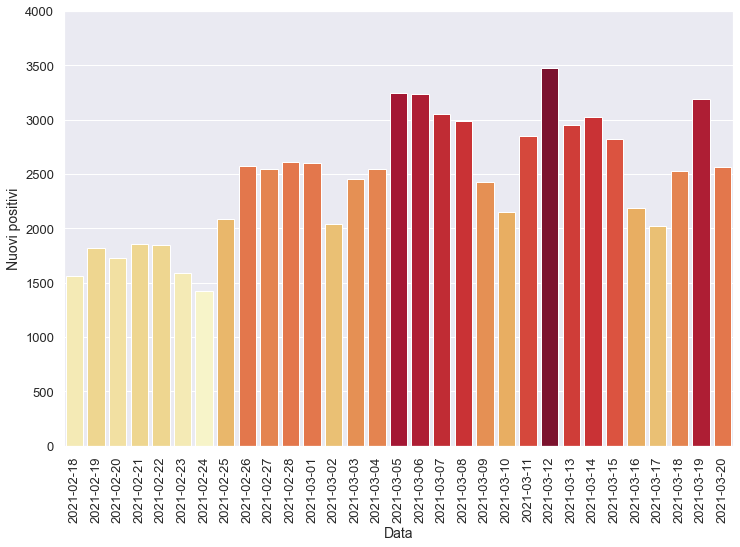

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

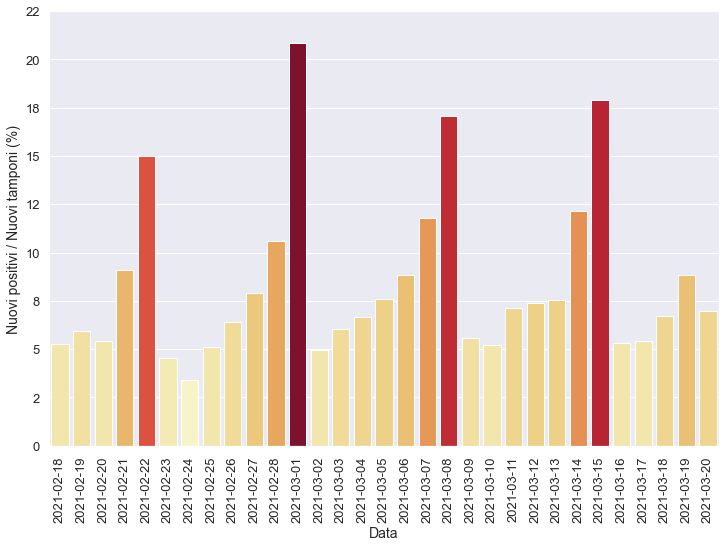

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

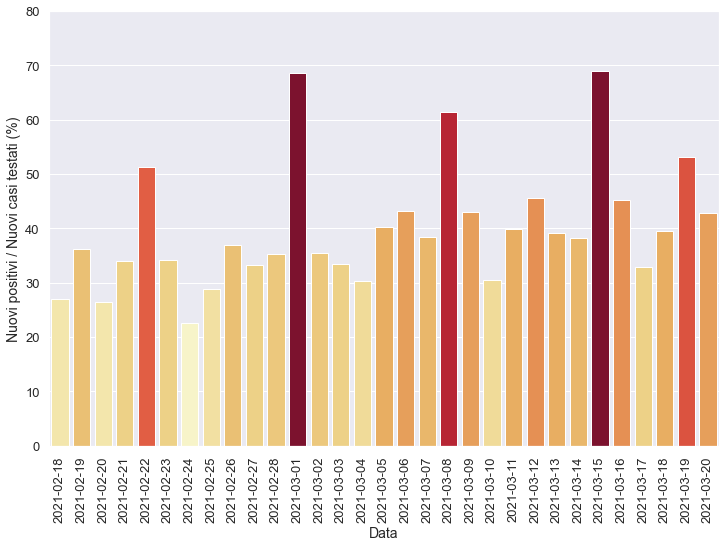

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

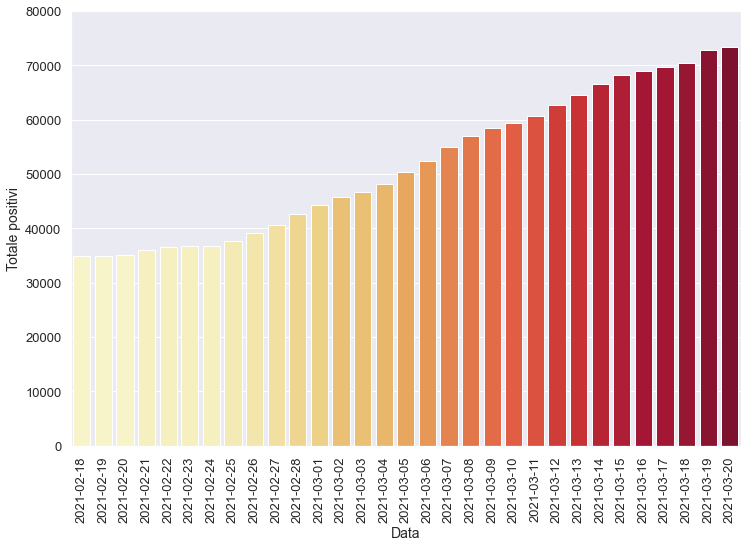

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

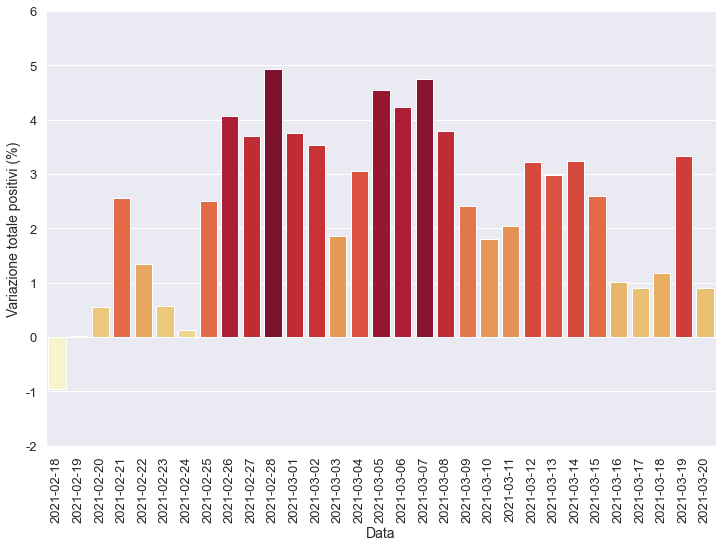

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

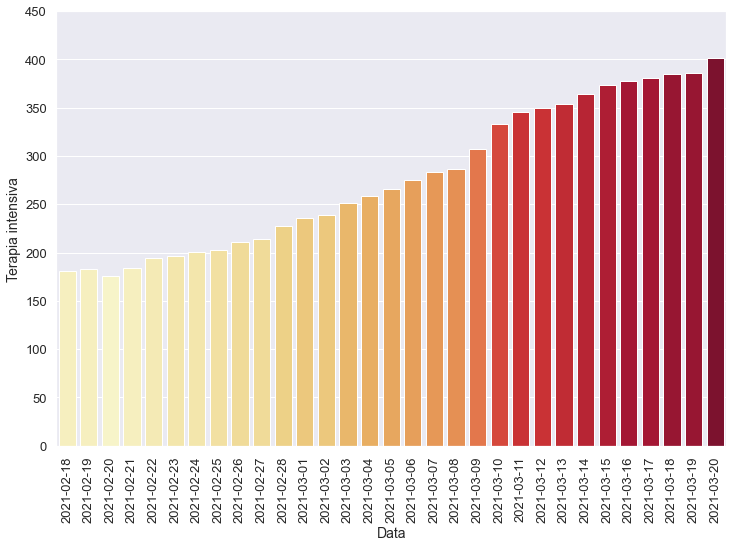

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

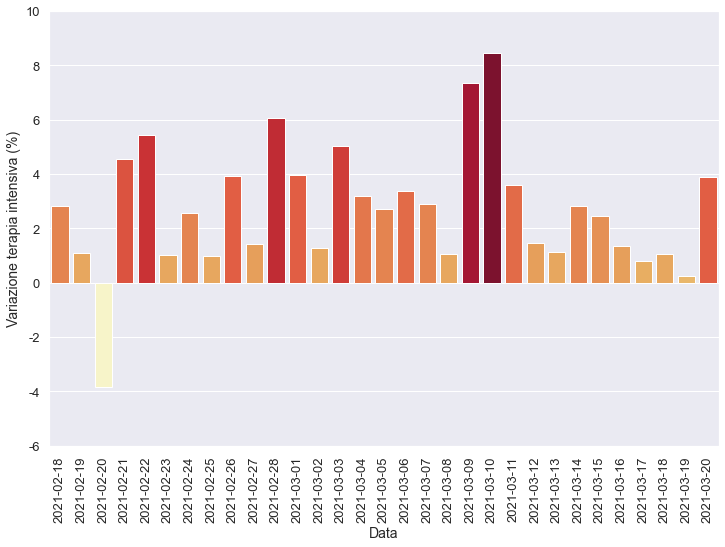

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

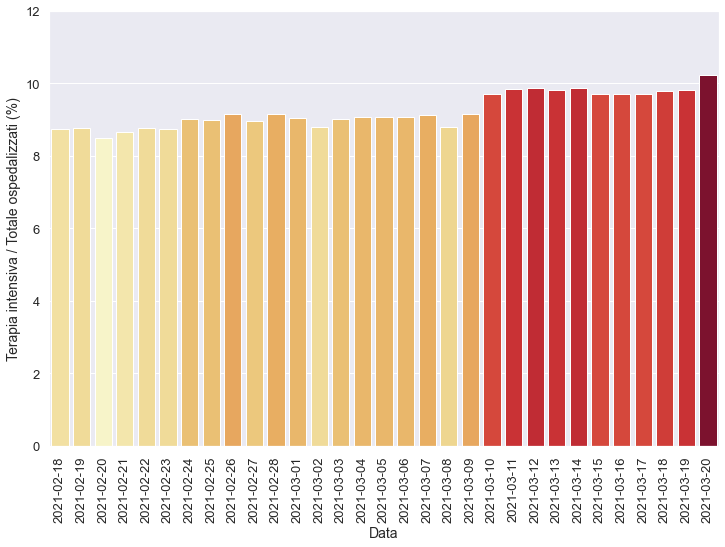

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

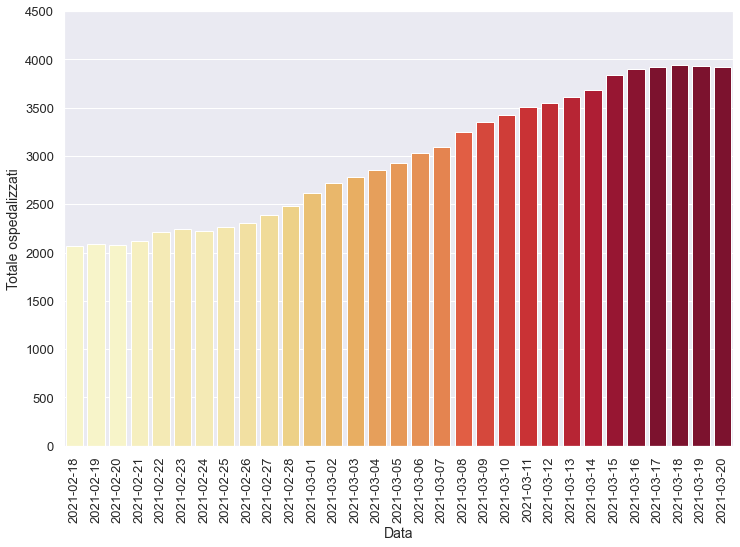

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

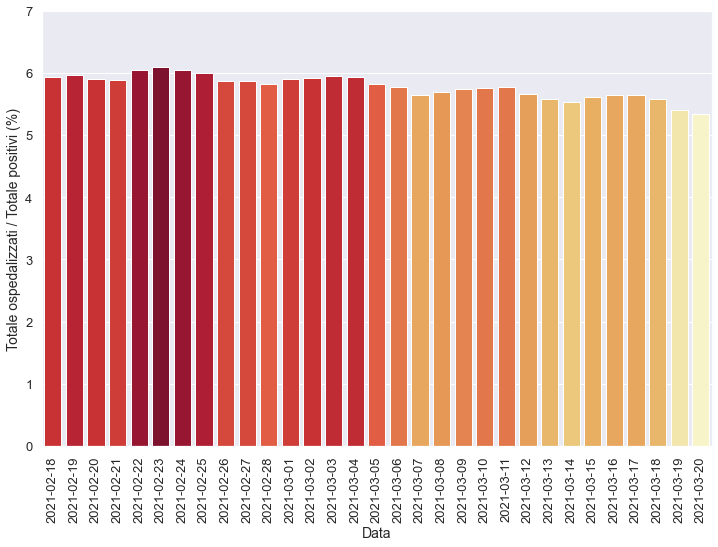

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

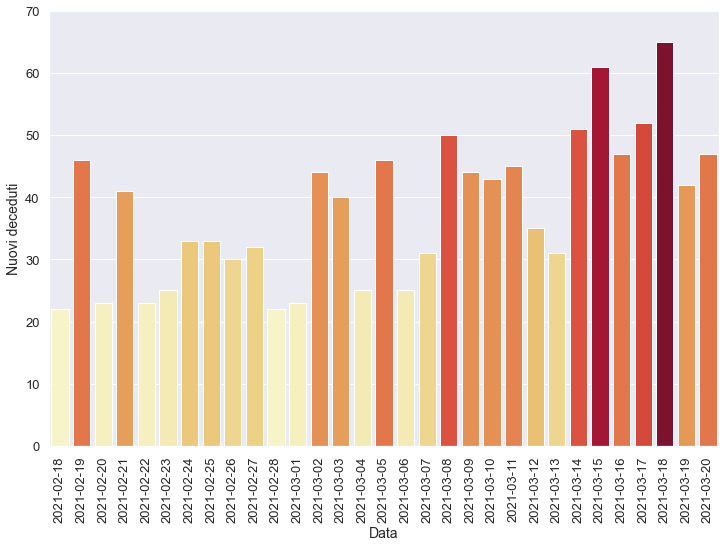

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

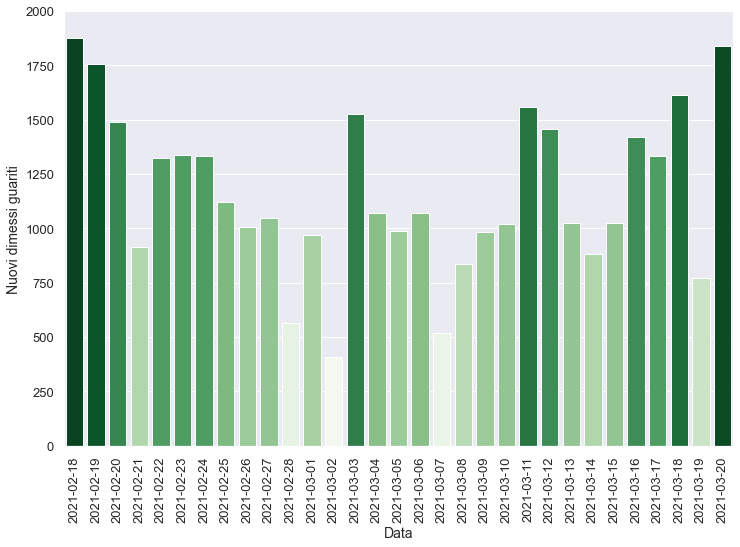

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-03-13T17:00:00,8,Emilia-Romagna,3254,354,3608,60879,64487,1870,2950,...,31.0,39228.0,7524.0,1809.0,9.81,5.59,7.52,39.21,1.14,2.99
1,2021-03-14T17:00:00,8,Emilia-Romagna,3321,364,3685,62883,66568,2081,3023,...,51.0,24909.0,7927.0,2004.0,9.88,5.54,12.14,38.14,2.82,3.23
2,2021-03-15T17:00:00,8,Emilia-Romagna,3464,373,3837,64456,68293,1725,2822,...,61.0,15767.0,4088.0,1573.0,9.72,5.62,17.90,69.03,2.47,2.59
3,2021-03-16T17:00:00,8,Emilia-Romagna,3516,378,3894,65098,68992,699,2184,...,47.0,41025.0,4834.0,642.0,9.71,5.64,5.32,45.18,1.34,1.02
4,2021-03-17T17:00:00,8,Emilia-Romagna,3542,381,3923,65692,69615,623,2026,...,52.0,37456.0,6155.0,594.0,9.71,5.64,5.41,32.92,0.79,0.90
5,2021-03-18T17:00:00,8,Emilia-Romagna,3551,385,3936,66502,70438,823,2531,...,65.0,37765.0,6399.0,810.0,9.78,5.59,6.70,39.55,1.05,1.18
6,2021-03-19T17:00:00,8,Emilia-Romagna,3549,386,3935,68852,72787,2349,3188,...,42.0,36016.0,6007.0,2350.0,9.81,5.41,8.85,53.07,0.26,3.33
7,2021-03-20T17:00:00,8,Emilia-Romagna,3519,401,3920,69519,73439,652,2560,...,47.0,36549.0,5976.0,667.0,10.23,5.34,7.00,42.84,3.89,0.90


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

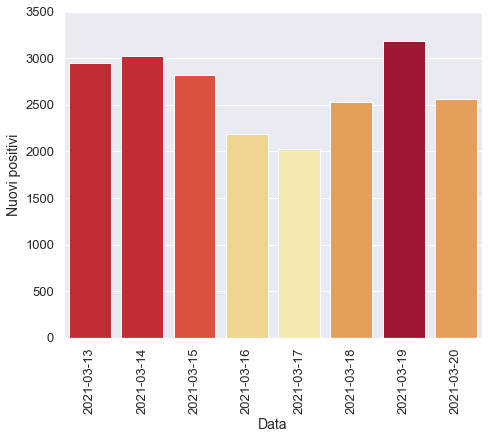

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

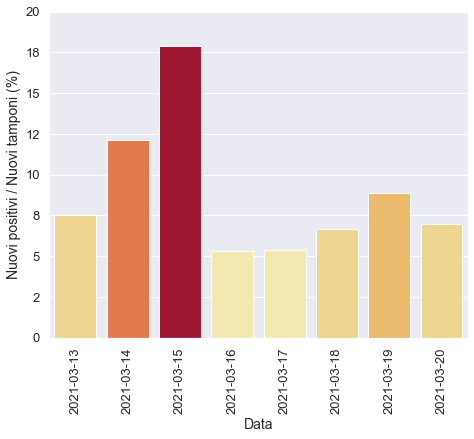

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

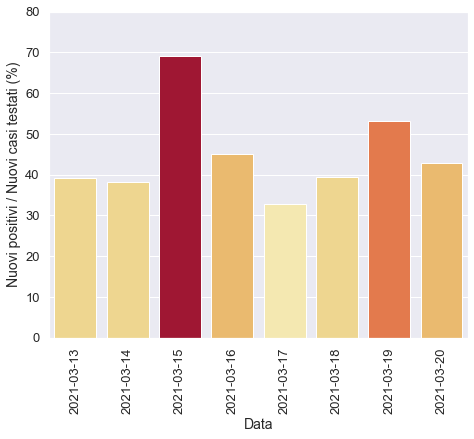

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

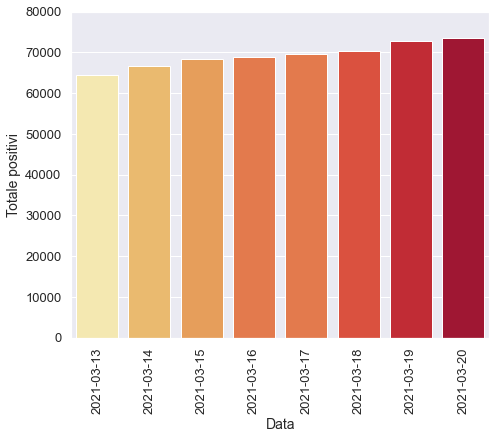

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

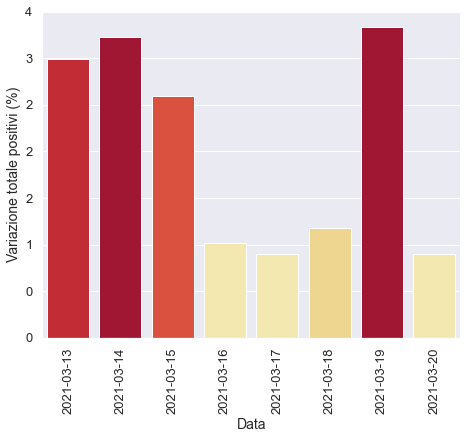

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

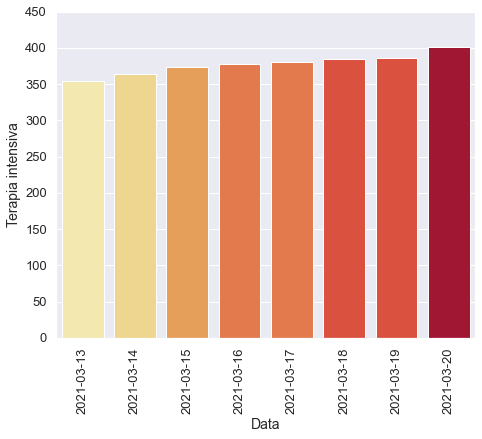

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

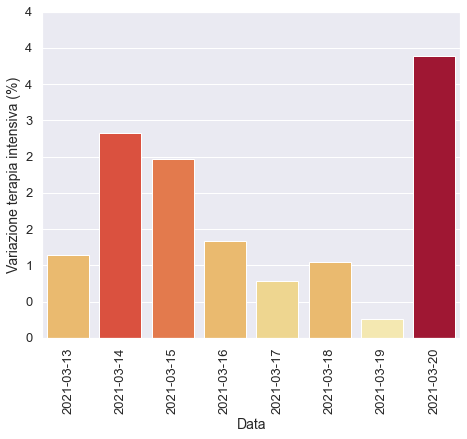

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

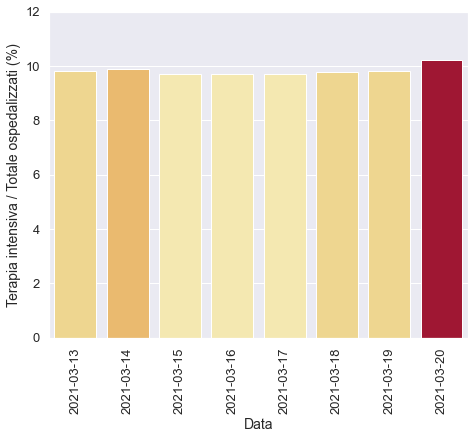

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

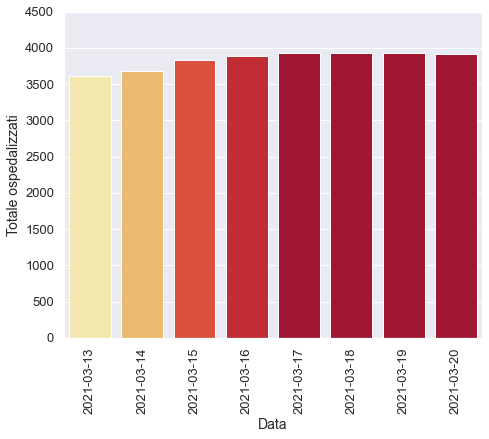

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

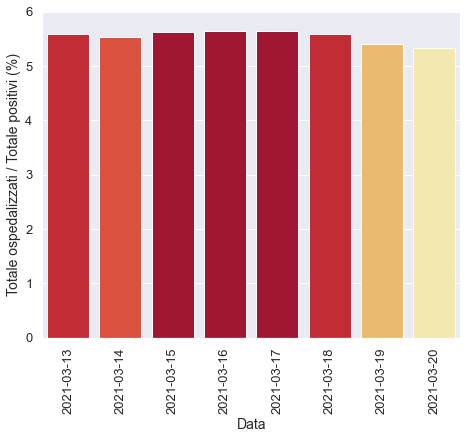

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

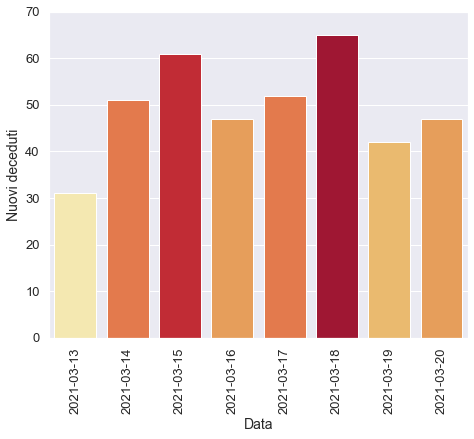

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

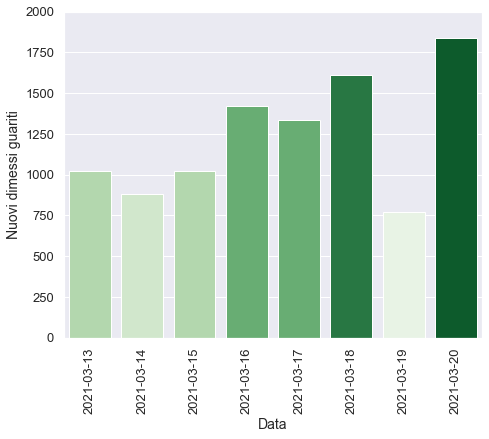

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)